<a href="https://colab.research.google.com/github/ZackAkil/optimising-basketball/blob/master/shot_prediction_app/predicting_shot_with_saved_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import model_from_json

Using TensorFlow backend.


In [0]:
# Authenticate to GCS.
from google.colab import auth
auth.authenticate_user()

In [0]:
! gsutil cp gs://rugby-videos/model.h5 .

Copying gs://rugby-videos/model.h5...
/ [1 files][ 27.2 MiB/ 27.2 MiB]                                                
Operation completed over 1 objects/27.2 MiB.                                     


In [0]:
! gsutil cp gs://rugby-videos/model.json .

Copying gs://rugby-videos/model.json...
/ [1 files][  2.8 KiB/  2.8 KiB]                                                
Operation completed over 1 objects/2.8 KiB.                                      


In [0]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
!gsutil cp gs://rugby-videos/deltas.mp4 .

Copying gs://rugby-videos/deltas.mp4...
/ [1 files][  6.0 MiB/  6.0 MiB]                                                
Operation completed over 1 objects/6.0 MiB.                                      


In [0]:
!pip install scikit-video --quiet

In [0]:
from skvideo.io import vread
import numpy as np

In [0]:
X_delta = vread('deltas.mp4')[:,:,:,0]
X = np.expand_dims(X_delta, axis=3)

In [0]:
import matplotlib.pyplot as plt

In [0]:
pred = loaded_model.predict(X[-1000:])

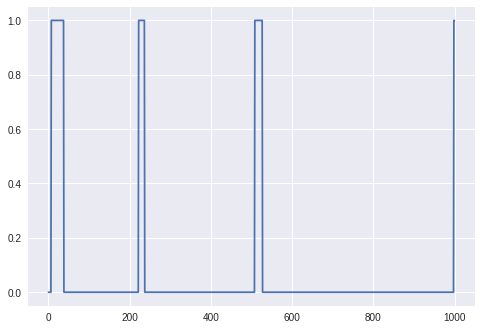

In [0]:
plt.plot(pred)